# Firms population


In [48]:
# #Load modules

import pandas as pd
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import seaborn as sns
# from numpy import log10
import numpy as np

# import warnings
# warnings.filterwarnings('ignore')

In [51]:
drive_path = './../../../export_france/data/type1/DP1610_MAASTRICHT1_1997_2013/'
y = 2012
colnames = [u'YEAR', u'MONTH', u'FLUX', u'ID', u'DEPT', u'CN ID 8', u'CPA6',
       u'PYOD', u'PAYP', u'VAT', u'PRIFAC', u'DEVFAC', u'VFTE', u'VART', u'D_MASSE', u'MASSE', u'USUP', u'USUP_MT']
colname_no = dict(zip(colnames, range(18)))
usecols = [0, 1, 2, 3, 10, 12, 13]
no_colname = {v: k for k, v in colname_no.items()}

df = pd.read_csv(drive_path+'DP1610_MAASTRICHT1_'+str(y)+'.txt',
                                 usecols = usecols,
               delimiter = ';', header = None, nrows = 1000000)
df.columns = [no_colname[k] for k in sorted(usecols)]

In [39]:
df.head()

,YEAR,MONTH,FLUX,VFTE,VART
0,2012,1,1,45004,44844
1,2012,1,1,300,261
2,2012,1,1,2090,1897
3,2012,1,1,12131,12031
4,2012,1,1,5318,5318


## Load data
### Here we load the data aggregated at (firm, year, flow) level. The only variable we know for each (firm, year, flow) is the 'VART_sum', that is, the sum of transaction values at border.

In [2]:

# path1 = './../../../../media/miglesia/Elements/export_france/data/type1/DP1610_MAASTRICHT1_1997_2013'

# firm_mx_y = pd.read_csv(path1+'/samplings/full_firm_mx_yr.csv')

In [43]:
# #Sample of the loaded dataset

# ix = ['ID', 'IMPORT', 'YEAR']
# display(firm_mx_y.sort_values(by = ix).head(20).set_index(ix))
# print('...')

## Drafts from now on..

In [44]:
# ### Sample dataset
# df = df_large_firms
# df2012_sam_1_im = df.loc[df.FLUX.isin([1, 3])]
# df2012_sam_1_ex = df.loc[df.FLUX.isin([2, 4])]

# # df2012_sam_1.to_csv('./df2012_sam_1.csv', index = False)

# # df2012_sam_1 = pd.read_csv('./df2012_sam_1.csv')



In [45]:
# plt.hist(np.log10(df2012_sam_1_ex['VART'].replace(0, np.nan).dropna().values), 50)
# plt.hist(np.log10(df2012_sam_1_im['VART'].replace(0, np.nan).dropna().values), 50)
# plt.show()

### VFTE vs VART

In [65]:
# Lo que hay que hacer es plotear las variables numericas contra todas, por ahi agrupando y suma segun distinta columna. Algunos plots pueden ser erroneos. -

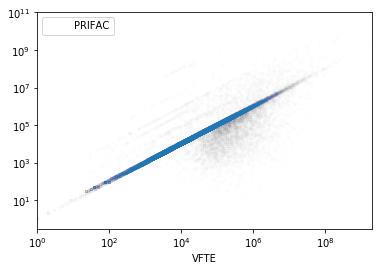

In [61]:
#Value variables

# dataset = df2012_sam_1_ex
dataset = df.copy()
df_ = dataset.groupby('ID').sum()[['PRIFAC', 'VFTE', 'VART']]
# df_ = dataset[['PRIFAC', 'VFTE', 'VART']]
df_ = df_.replace(0, np.nan).dropna()
df_.plot(x = 'VFTE', y = 'PRIFAC', marker = '.', linewidth = 0, alpha = .003)
plt.xscale('log')
plt.yscale('log')
plt.show()

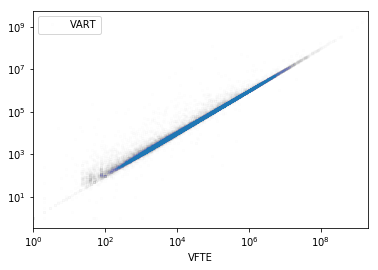

In [62]:
df_.plot(x = 'VFTE', y = 'VART', marker = '.', linewidth = 0, alpha = .003)
plt.xscale('log')
plt.yscale('log')
plt.show()

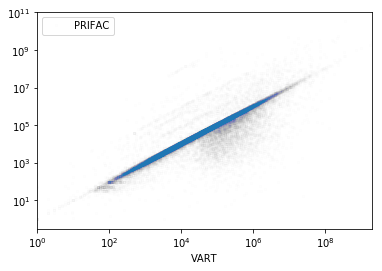

In [63]:
df_.plot(x = 'VART', y = 'PRIFAC', marker = '.', linewidth = 0, alpha = .003)
plt.xscale('log')
plt.yscale('log')
plt.show()